In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [4]:
etc = pd.read_csv('naver_dataframe.csv',encoding = 'utf-8')

In [5]:
len(etc)

490

In [6]:
etc.head()

,Unnamed: 0,title,contents
0,0,현대차 주가 7.7% 올린 '전기차 전용 플랫폼'.. 기대와 우려 [김...,그렇지만 3일 하루의 유난히 눈에 띄는 주가 흐름은 E-GMP가 시장의 기대에 충분...
1,1,고금리 적금부터 세테크까지..전업맘 재테크 여왕의 투자 6계명,그가 “전업 맘들은 되도록 주식하지 마세요. 주가 많이 빠지면 아이들한테 괜히 신경...
2,2,"롯데케미칼, 2차전지 관련주로 거듭날 수 있을까? [주코노미TV]",더 주가상승의 날개를 달 수 있지 않을까하는 기대감을 산다는 입장에서는 가지고 있는...
3,3,"""인기 많은 소형 공모주"" 에프앤가이드·알체라 청약",주주는 네이버 자회사 스노우다. ━ 바이오 대어 지놈앤컴퍼니 등 5곳 줄줄이 수요예...
4,4,시가총액 100대 기업 주간 주가 등락률은?...신풍제약·셀트리온...,"주간 주가 하락률 상위 10개 기업은 다음과 같다. 두산중공업 14900원, -22..."


In [7]:
etc2 = list(etc.title)

etc2[0:2]

["현대차 주가 7.7% 올린 '전기차 전용 플랫폼'.. 기대와 우려 [김...",
 '고금리 적금부터 세테크까지..전업맘 재테크 여왕의 투자 6계명']

In [8]:
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in etc2:
    clean = strip_punctuation(sent)
    clean_title.append(clean)
    
clean_title[0:1]

['현대차 주가 77 올린 전기차 전용 플랫폼 기대와 우려 김']

In [9]:
from konlpy.tag import Kkma
kkma = Kkma()

In [10]:
import time
import datetime
start = time.time()

In [11]:
dataset = []
for i in range(len(clean_title)) :
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z\s]', '', clean_title[i])))

sec = time.time()-start
times = str(datetime.timedelta(seconds = sec)).split(".")
times = times[0]
print(times)

0:00:13


In [12]:
clean_title2 = []
for i in range(len(clean_title)) :
    clean_title2.append(re.sub('주차',' ',clean_title[i]))
clean_title3 = []
for i in range(len(clean_title2)):
    clean_title3.append(re.sub('스마트', ' ', clean_title2[i]))
clean_title4 = []
for i in range(len(clean_title3)):
    clean_title4.append(re.sub('민영화', ' ', clean_title3[i]))
clean_title5 = []
for i in range(len(clean_title4)):
    clean_title5.append(re.sub('너무', ' ', clean_title4[i]))
clean_title6 = []
for i in range(len(clean_title5)):
    clean_title6.append(re.sub('요즘', ' ', clean_title5[i]))
clean_title7 = []
for i in range(len(clean_title6)):
    clean_title6.append(re.sub('돌림판', ' ', clean_title5[i]))

In [13]:
!pip install gensim

In [15]:
from gensim import corpora, models
import gensim

In [16]:
high_score_reviews = dataset

In [17]:
high_score_reviews = [[y for y in x if not len(y) == 1]
                     for x in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus = [dictionary.doc2bow(text) for text in high_score_reviews]

In [18]:
import matplotlib.pyplot as ply
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts = high_score_reviews, dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

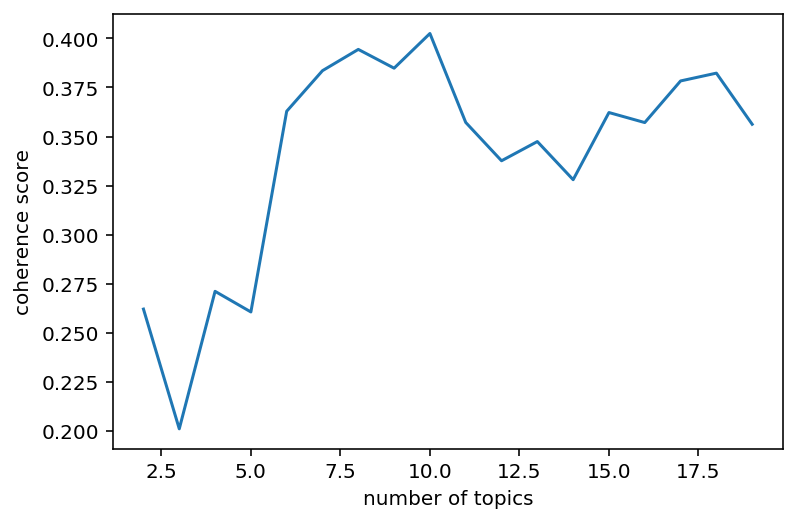

In [19]:
x = range(2,20)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [20]:
perplexity_values = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

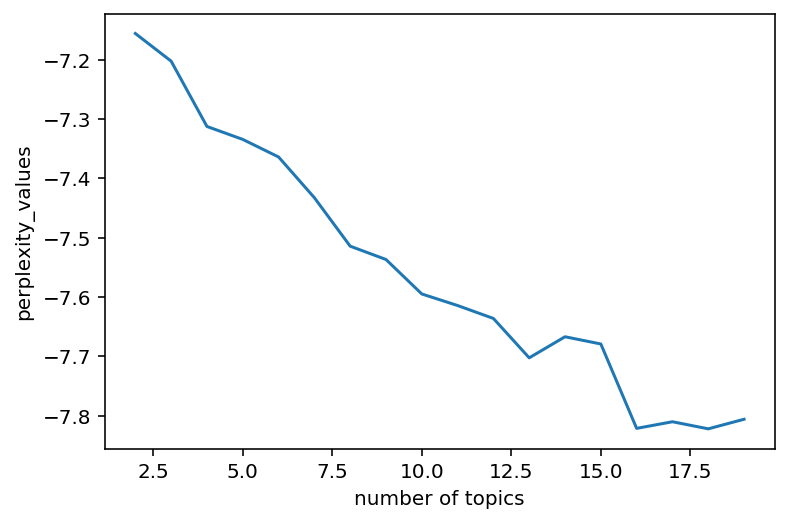

In [21]:
x=range(2,20)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity_values")
plt.show()

In [40]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=8, alpha=0.1, id2word = dictionary)

In [41]:
ldamodel.print_topics(num_words=6)

[(0,
  '0.035*"코스" + 0.032*"코스피" + 0.013*"하락" + 0.011*"주가" + 0.011*"상승" + 0.010*"코스닥"'),
 (1,
  '0.034*"코스" + 0.030*"코스피" + 0.017*"증시" + 0.015*"최고" + 0.013*"마감" + 0.010*"상승"'),
 (2,
  '0.010*"코스" + 0.009*"코스피" + 0.009*"네이버" + 0.008*"매수" + 0.008*"삼성" + 0.008*"종목"'),
 (3,
  '0.024*"코스" + 0.022*"코스피" + 0.015*"삼성" + 0.013*"전자" + 0.013*"삼성전자" + 0.011*"마감"'),
 (4,
  '0.016*"투자리포트" + 0.016*"자리" + 0.015*"포트" + 0.015*"베타" + 0.014*"주가" + 0.009*"삼성"'),
 (5,
  '0.021*"주가" + 0.012*"코스" + 0.011*"코스피" + 0.010*"코스닥" + 0.009*"투자" + 0.007*"증시"'),
 (6,
  '0.031*"코스" + 0.030*"코스피" + 0.012*"최고" + 0.011*"상승" + 0.011*"사상" + 0.009*"이틀"'),
 (7,
  '0.020*"베타" + 0.020*"포트" + 0.020*"코스" + 0.019*"자리" + 0.017*"투자리포트" + 0.016*"코스피"')]

In [42]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.118112 -0.024503       1        1  15.493806
7     -0.067873 -0.040977       2        1  13.647864
6      0.057428 -0.034876       3        1  13.367520
4     -0.122811 -0.033605       4        1  12.395595
1      0.031798 -0.019688       5        1  11.638539
5      0.012859  0.131132       6        1  11.467806
3      0.004184 -0.061049       7        1  11.150709
2     -0.033698  0.083567       8        1  10.838160, topic_info=      Term       Freq      Total Category  logprob  loglift
186     자리  31.000000  31.000000  Default  30.0000  30.0000
187  투자리포트  30.000000  30.000000  Default  29.0000  29.0000
184     베타  32.000000  32.000000  Default  28.0000  28.0000
188     포트  32.000000  32.000000  Default  27.0000  27.0000
5       주가  35.000000  35.000000  Default  26.0000  26.0000
..     ...        ...        ...      ...      ...      ...
44      상승   2.213793  31.600052   Topic8  -5.3265  -0.4364
288     사업   1.733941   7.912372   Topic8  -5.5708   0.7041
77      주식   1.721315  10.925682   Topic8  -5.5781   0.3741
80      최고   1.505415  33.250076   Topic8  -5.7122  -0.8729
466     시대   1.505375   6.366031   Topic8  -5.7122   0.7802

[568 rows x 6 columns], token_table=      Topic      Freq Term
term                      
499       4  0.694842   가능
499       5  0.347421   가능
1065      8  0.934923   가슴
609       3  0.690454   가입
609       8  0.345227   가입
...     ...       ...  ...
110       6  0.204784   회장
624       3  0.914126   흥행
1254      5  0.289760   히트
1254      6  0.289760   히트
1254      7  0.289760   히트

[964 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 7, 5, 2, 6, 4, 3])

In [29]:
pyLDAvis.save_html(vis, 'topicmodeling-daum_naver.html')

In [36]:
kk = ldamodel.show_topic(10, topn=80000)
type(ldamodel.show_topic)
kk2 = pd.DataFrame(kk)
kk2.head(6)

,0,1
0,삼성전자,0.029265
1,전자,0.029265
2,삼성,0.029262
3,코스,0.023602
4,코스피,0.021124
5,거래소,0.017130


In [31]:
kk2.to_csv('top5.csv', encoding="euc-kr")

In [32]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()
    
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc, key =lambda x: (x[1]), reverse= True)
        
        
        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index = True)
            else:
                break
    return(topic_table)

In [33]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index()
topictable.columns = ['문서번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중','각 토픽의 비중']
topictable[:10]

,문서번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,15.0,0.8505,"[(15, 0.8504547)]"
1,1,0.0,0.8632,"[(0, 0.86323595)]"
2,2,11.0,0.8161,"[(0, 0.011495797), (1, 0.011495745), (2, 0.011..."
3,3,1.0,0.8161,"[(0, 0.011495524), (1, 0.8160753), (2, 0.01149..."
4,4,14.0,0.5415,"[(9, 0.34035018), (14, 0.5415084)]"
5,5,14.0,0.8161,"[(0, 0.011494883), (1, 0.011494883), (2, 0.011..."
6,6,0.0,0.0588,"[(0, 0.05882353), (1, 0.05882353), (2, 0.05882..."
7,7,9.0,0.8350,"[(0, 0.0103098275), (1, 0.010310151), (2, 0.01..."
8,8,3.0,0.8350,"[(0, 0.010310457), (1, 0.01030964), (2, 0.0103..."
9,9,2.0,0.8161,"[(0, 0.011496004), (1, 0.011498017), (2, 0.816..."


In [34]:
topictable.to_csv("토픽테이블-daum_naver.csv", encoding = "euc-kr", index = False)